In [95]:
import pandas as pd
import re
import emoji
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import groupby, islice

In [2]:
covid = pd.read_csv('covid19_tweets_sentiment.csv')

/Users/ivywang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
covid.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,sentiment_score
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,NEGATIVE,0.993067
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,NEGATIVE,0.987818
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,NEGATIVE,0.992243
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,POSITIVE,0.998897
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,NEGATIVE,0.992979
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071.0,1287.0,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,NEGATIVE,0.997776
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810.0,3801.0,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False,NEGATIVE,0.983864
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355.0,95.0,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,NEGATIVE,0.965411
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29.0,18.0,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False,NEGATIVE,0.964648
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239.0,29802.0,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,NEGATIVE,0.979755


In [62]:
emoji.demojize(covid['user_description'][4])

':pen_selector:Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir'

In [64]:
pattern = "\:\w+\:"
emoji.emojize(re.findall(pattern,emoji.demojize(covid['user_description'][4]))[0])

'🖊️'

In [84]:
def extractMentions(text):
    '''Extract @ information from tweets'''
    pattern = "\@\w+"
    mention = []
    for i in range(len(text)):
        mention.append(re.findall(pattern, str(text[i]) ))
    return mention

def extractHashTags(text):
    '''Extract # information from tweets'''
    pattern = "\#\w+"
    hashtag = []
    for i in range(len(text)):
        mention.append(re.findall(pattern, str(text[i]) ))
    return hashtag

def extractEmoji(text):
    '''Extract Emojis from tweets'''
    pattern = "\:\w+\:"
    emoji_list = []
    for i in range(len(text)):
        emoji_list.append(re.findall(pattern, emoji.demojize(str(text[i]))))
    return emoji_list

In [39]:
len(covid['text'])

179113

In [67]:
mentions = extractMentions(covid['text'].values)

In [65]:
hashtags = extractHashTags(covid['text'].values)

In [178]:
emojis = extractEmoji(covid['text'].values)

In [89]:
emojis_user = extractEmoji(covid['user_description'].values)

In [153]:
individual_entity = list(itertools.chain(*mentions))
entity_freq = {}
for item in individual_entity: 
    if (item in entity_freq): 
        entity_freq[item] += 1
    else: 
        entity_freq[item] = 1
entity_freq_sorted = {k: v for k, v in sorted(entity_freq.items(), key=lambda item: item[1],reverse=True)}
entity_freq_top_k = list(islice(entity_freq_sorted.items(), 10))
entity_freq_top_k_tags = [i[0] for i in entity_freq_top_k]
entity_freq_top_k_freq = [i[1] for i in entity_freq_top_k]
    

In [161]:
def top_k_entities(extracted, k, extract_type, plot = True):
    individual_entity = list(itertools.chain(*extracted))
    entity_freq = {}
    for item in individual_entity: 
        if (item in entity_freq): 
            entity_freq[item] += 1
        else: 
            entity_freq[item] = 1
    entity_freq_sorted = {k: v for k, v in sorted(entity_freq.items(), key=lambda item: item[1],reverse=True)}
    entity_freq_top_k = list(islice(entity_freq_sorted.items(), k))
    entity_freq_top_k_tags = [i[0] for i in entity_freq_top_k]
    entity_freq_top_k_freq = [i[1] for i in entity_freq_top_k]
    if plot:
        plt.figure(figsize=(15,8))
        plt.bar(entity_freq_top_k_tags,entity_freq_top_k_freq)
        plt.title('Histogram of the Top '+str(k)+ ' '+extract_type)
        plt.xticks(rotation=30)
        plt.show()
    return entity_freq_top_k,entity_freq_top_k_tags,entity_freq_top_k_freq
    

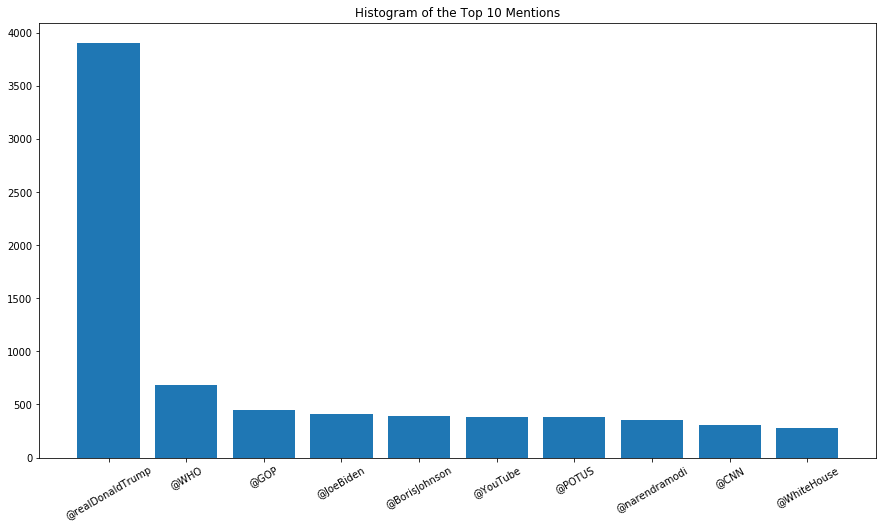

In [166]:
_ = top_k_entities(mentions,10,'Mentions')

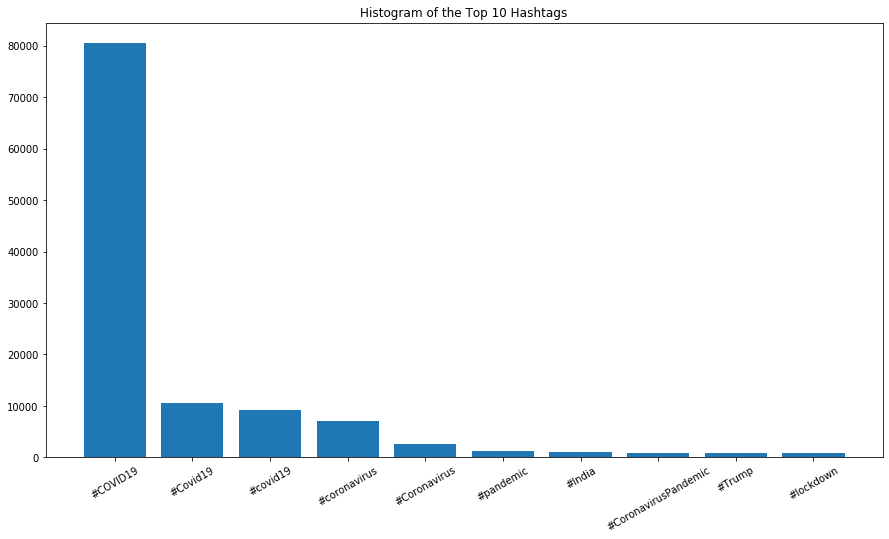

In [167]:
_ = top_k_entities(hashtags,10,'Hashtags')

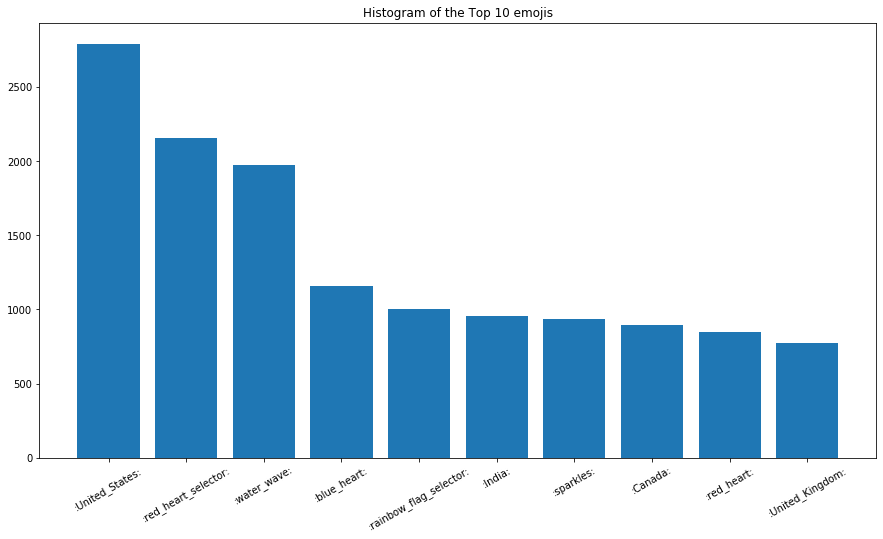

In [169]:
_ = top_k_entities(emojis,10,'emojis')

In [174]:
emoji.emojize(':red_heart_selector:')

'❤️'

In [176]:
emoji.emojize(':water_wave:')

'🌊'

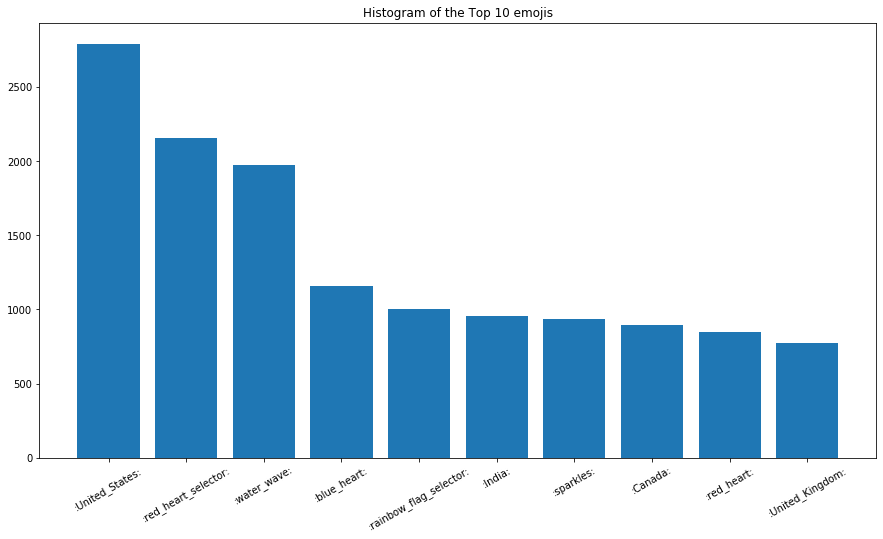

In [177]:
_ = top_k_entities(emojis_user,10,'emojis in user description')